# Machine Learning: Support Vector Machines

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/pulsar_stars.csv"
)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
# view the column names of the dataframe

col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [4]:
# remove leading spaces from column names
# 'strip()' se utiliza para eliminar los espacios en blanco al comienzo y al final de una cadena

df.columns = df.columns.str.strip()

In [5]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
# rename column names

df.columns = [
    "IP Mean",
    "IP Sd",
    "IP Kurtosis",
    "IP Skewness",
    "DM-SNR Mean",
    "DM-SNR Sd",
    "DM-SNR Kurtosis",
    "DM-SNR Skewness",
    "target_class",
]

In [7]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

Our target variable is the target_class column. So, I will check its distribution.

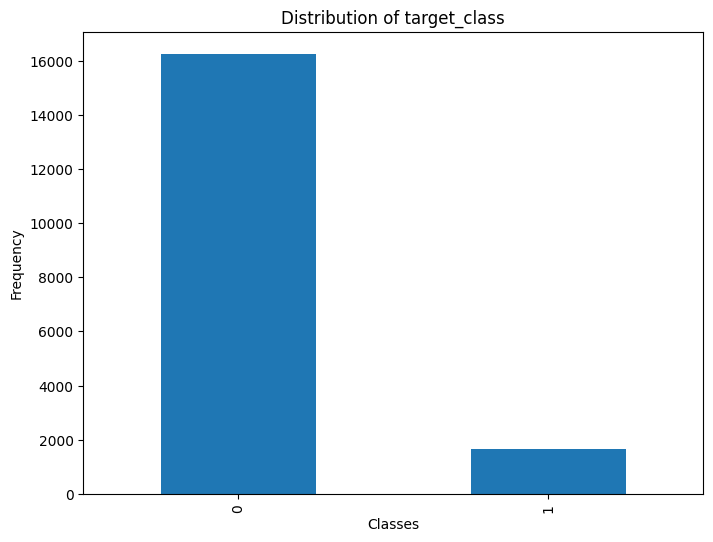

In [8]:
# check distribution of target_class column

plt.figure(figsize=(8, 6))
df["target_class"].value_counts().plot(kind="bar")
plt.title("Distribution of target_class")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

In [9]:
# view the percentage distribution of target_class column

df["target_class"].value_counts() / np.float(len(df))

C:\Users\Andres\AppData\Local\Temp\ipykernel_15804\4094021010.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["target_class"].value_counts() / np.float(len(df))


target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

In [10]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


## Explore missing values in variables

In [11]:
# check for missing values in variables and remove them

# We sum the missing values for each column
missing_counts = df.isna().sum()

# Displaying columns with missing values and their counts
print(missing_counts)

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64


As we can see, after adding up all the null values, we print the number of null values for each column. In this case, there are no null values present.

## Outliers in numerical variables

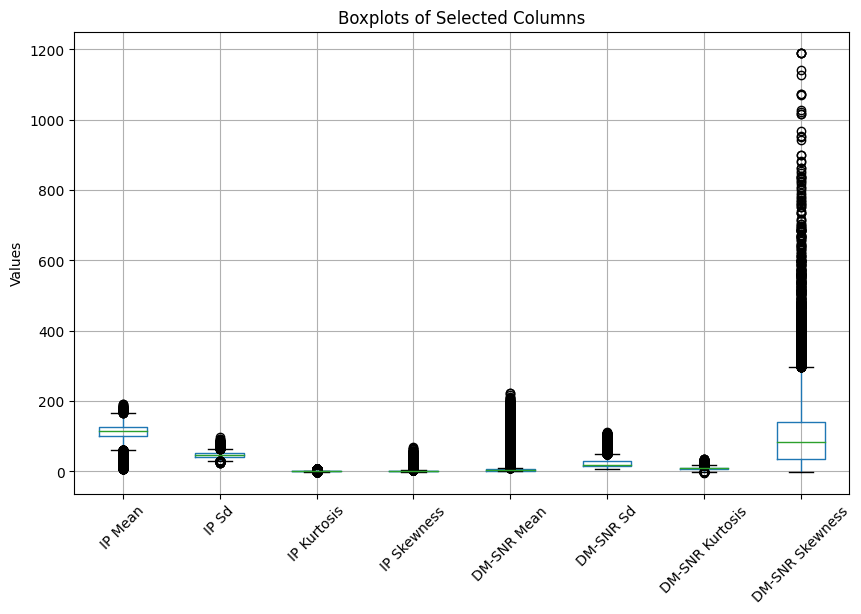

In [12]:
# draw boxplots to visualize outliers

# We select the columns to create boxplots
selected_columns = [
    "IP Mean",
    "IP Sd",
    "IP Kurtosis",
    "IP Skewness",
    "DM-SNR Mean",
    "DM-SNR Sd",
    "DM-SNR Kurtosis",
    "DM-SNR Skewness",
]

# Then, we create boxplots for the selected columns
plt.figure(figsize=(10, 6))
df[selected_columns].boxplot()
plt.title("Boxplots of Selected Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

## Check the distribution of variables

<Figure size 1200x800 with 0 Axes>

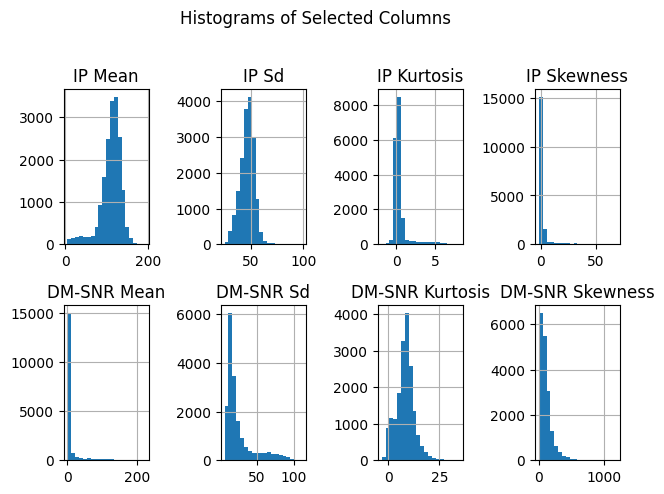

In [13]:
# plot histogram to check distribution

# We create histograms for the selected columns
plt.figure(figsize=(12, 8))
df[selected_columns].hist(bins=20, layout=(2, 4))
plt.suptitle("Histograms of Selected Columns", y=1.02)
plt.tight_layout()
plt.show()

## Split data into separate training and test set

In [14]:
# split X and y into training and testing sets

# We import the necessary library
from sklearn.model_selection import train_test_split

# We define X and y
X = df.drop("target_class", axis=1)
y = df["target_class"]

# We split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

## Feature Scaling

In [16]:
# Scale features

# We import the necessary library
from sklearn.preprocessing import StandardScaler

# Then, we create a StandardScaler object
scaler = StandardScaler()

# And, we fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000
mean,111.081995,46.539751,0.477679,1.765880,12.643483,26.276780,8.327415,105.607217
std,25.643568,6.832878,1.061609,6.149554,29.603410,19.502448,4.531324,107.863865
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.804688,42.358678,0.026190,-0.188861,1.915552,14.411706,5.796460,35.268988
50%,115.183594,46.939337,0.223393,0.200881,2.799331,18.442040,8.432919,83.097824
75%,127.066406,50.991815,0.472364,0.929593,5.430184,28.262450,10.721754,139.993975
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


## Run SVM with default hyperparameters

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [18]:
# We import the necessary library:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# We create a SVM classifier with default hyperparameters:
svm_classifier = SVC()

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# Finally, we calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9731843575418995


Run SVM with rbf kernel and C=100.0

We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [19]:
# We create a SVM classifier with 'rbf' kernel and C=100:
svm_classifier = SVC(kernel="rbf", C=100)

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# We calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.979608938547486


Run SVM with rbf kernel and C=1000.0

In [22]:
# We create a SVM classifier with 'rbf' kernel and C=1000:
svm_classifier = SVC(kernel="rbf", C=1000)

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# We calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.979608938547486


## Run SVM with linear kernel

Run SVM with linear kernel and C=1.0

In [23]:
# We create a SVM classifier with 'linear' kernel and C=1:
svm_classifier = SVC(kernel="linear", C=1)

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# We calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.979050279329609


Run SVM with linear kernel and C=100.0

In [24]:
# We create a SVM classifier with 'linear' kernel and C=100:
svm_classifier = SVC(kernel="linear", C=100)

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# We calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9784916201117319


Run SVM with linear kernel and C=1000.0

In [25]:
# We create a SVM classifier with 'linear' kernel and C=1000:
svm_classifier = SVC(kernel="linear", C=1000)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9793296089385475


## Run SVM with polynomial kernel

Run SVM with polynomial kernel and C=1.0

In [26]:
# We create a SVM classifier with 'polynomial' kernel and C=1:
svm_classifier = SVC(kernel="poly", C=1)

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# We calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9709497206703911


Run SVM with polynomial kernel and C=100.0

In [ ]:
# We create a SVM classifier with 'polynomial' kernel and C=100:
svm_classifier = SVC(kernel="poly", C=1)

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# We calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## Run SVM with sigmoid kernel

Run SVM with sigmoid kernel and C=1.0

In [27]:
# We create a SVM classifier with 'sigmoid' kernel and C=1:
svm_classifier = SVC(kernel="sigmoid", C=1)

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# We calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9245810055865922


Run SVM with sigmoid kernel and C=100.0

In [28]:
# We create a SVM classifier with 'sigmoid' kernel and C=100:
svm_classifier = SVC(kernel="sigmoid", C=100)

# We fit the classifier on the training data:
svm_classifier.fit(X_train, y_train)

# We make predictions on the testing data:
y_pred = svm_classifier.predict(X_test)

# We calculate accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9212290502793297
